Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as ps
%matplotlib inline


In [ ]:
!ls

drive  sample_data


In [ ]:
d = pd.read_csv('/content/drive/MyDrive/Unemployment in India.csv')

In [ ]:
d.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
d.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
d.shape

(768, 7)

In [ ]:
d.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Data Preprocessing



*   Data Cleaning




In [ ]:
d.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
d.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
d=d.dropna()

In [ ]:
d.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
d= d.fillna(d.mean())

<ipython-input-21-da0fd6fc6ef9>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d= d.fillna(d.mean())


In [ ]:
d.shape

(740, 7)



*   Data reshaping



In [ ]:
d.rename(columns={'Region': 'State'}, inplace=True)

In [ ]:
d

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [ ]:
d.columns = d.columns.str.strip()
print(d.columns)

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [ ]:
average_unemployment_rate = d.groupby('State')['Estimated Unemployment Rate (%)'].mean()

In [ ]:
state_with_highest_unemployment = average_unemployment_rate.idxmax()
print("State with the highest unemployment rate:", state_with_highest_unemployment)
highest_unemployment_rate = average_unemployment_rate.max()
print("Highest unemployment rate:", highest_unemployment_rate)

State with the highest unemployment rate: Tripura
Highest unemployment rate: 28.350357142857142


In [ ]:
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
lowest_unemployment_rate = average_unemployment_rate.min()
print("Lowest unemployment rate:", lowest_unemployment_rate)

State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 4.7988888888888885


Data Visualization

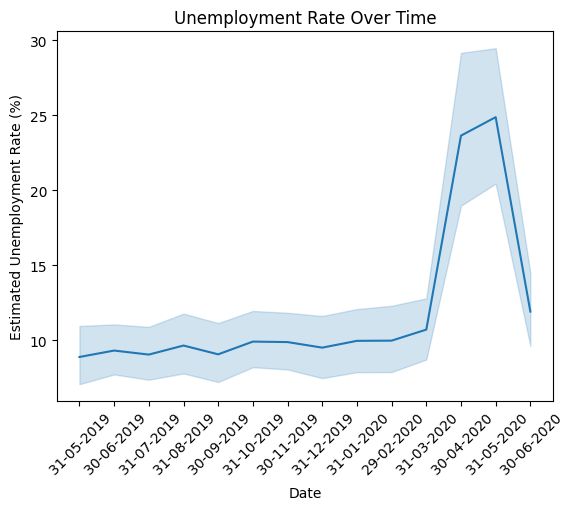

In [ ]:
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=d)
plt.xticks(rotation=45)
plt.title('Unemployment Rate Over Time')
plt.show()

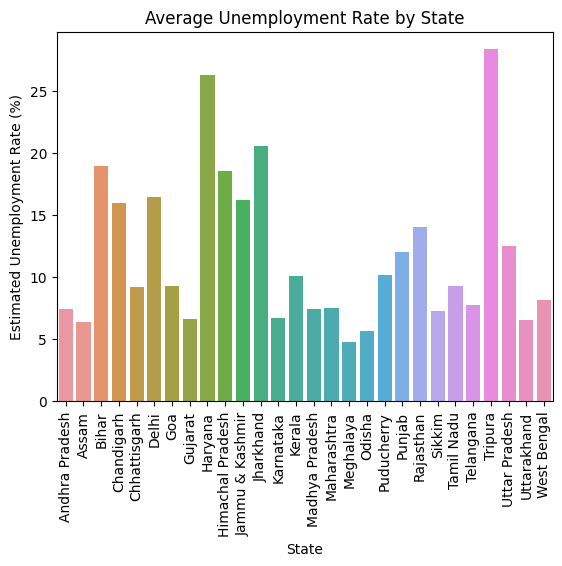

In [ ]:
state_avg_unemployment = d.groupby('State')['Estimated Unemployment Rate (%)'].mean().reset_index()
sns.barplot(x='State', y='Estimated Unemployment Rate (%)', data=state_avg_unemployment)
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate by State')
plt.show()

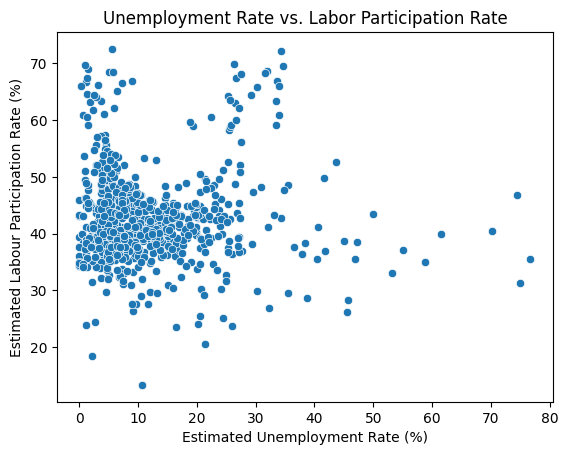

In [ ]:
sns.scatterplot(x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', data=d)
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.show()

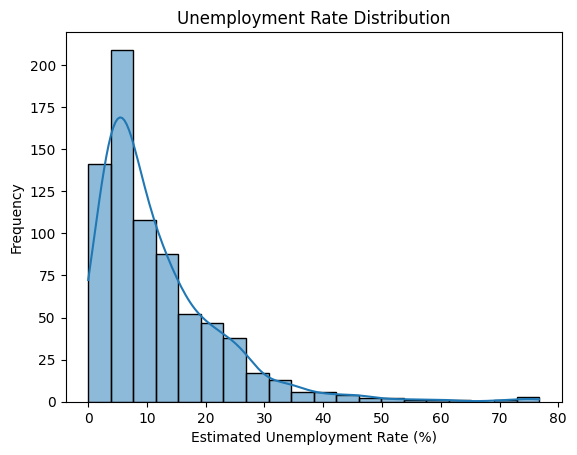

In [ ]:
sns.histplot(d['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Unemployment Rate Distribution')
plt.show()


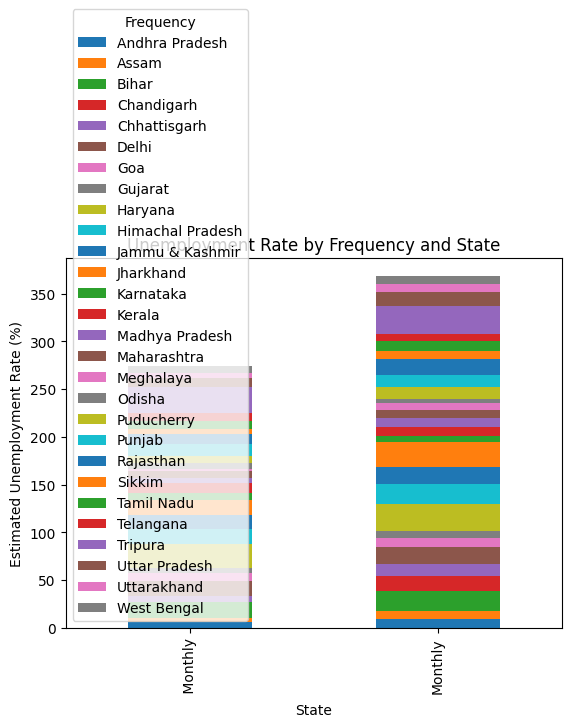

In [ ]:
freq_state_unemployment = d.groupby(['Frequency', 'State'])['Estimated Unemployment Rate (%)'].mean().unstack()
freq_state_unemployment.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Frequency and State')
plt.legend(title='Frequency')
plt.show()


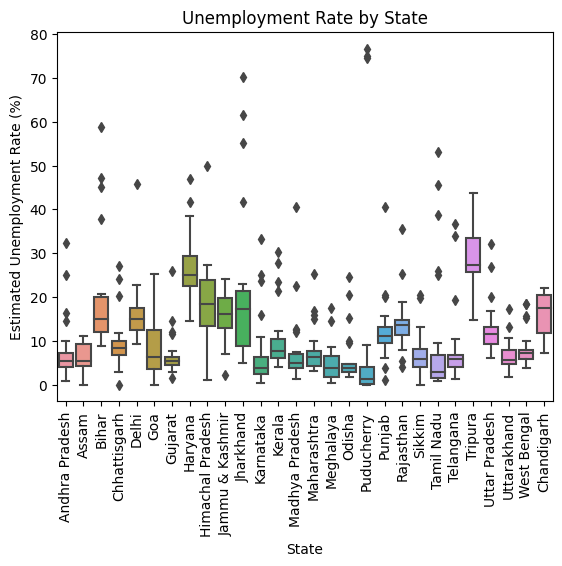

In [ ]:
sns.boxplot(x='State', y='Estimated Unemployment Rate (%)', data=d)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by State')
plt.show()